<a href="https://colab.research.google.com/github/Rorando111/cpe019/blob/main/Celeste_Assignment_10_2_ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 10.2 - ARIMA Model** |
**Name** | Celeste, Rolando
**Section** | CPE32S9
**Date Performed**: | 04/27/2024
**Date Submitted**: | 04/27/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

For this assignment, do the following:

1. Load time series data: data.csvDownload data.csv
2. Visualize the time series
3. Fit an ARIMA Model (baseline model order = (1,1,1))
4. Improve the ARIMA Model
5. Print the model summary
6. Make a forecast (steps=10)
7. Plot the forecast
8. Perform a grid search
**Supplementary Activity**:  do the same for this dataset - dataset_temperature.csv

### **Importing libraries, loading dataset data.csvDownload data.csv, and visualizing time series**


<ipython-input-1-797cc9937da2>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv(file_path, header=0, parse_dates=[0], index_col=0, date_parser=parser)


            CO2 (ppm)
Month                
1965-01-01     319.32
1965-02-01     320.36
1965-03-01     320.82
1965-04-01     322.06
1965-05-01     322.17


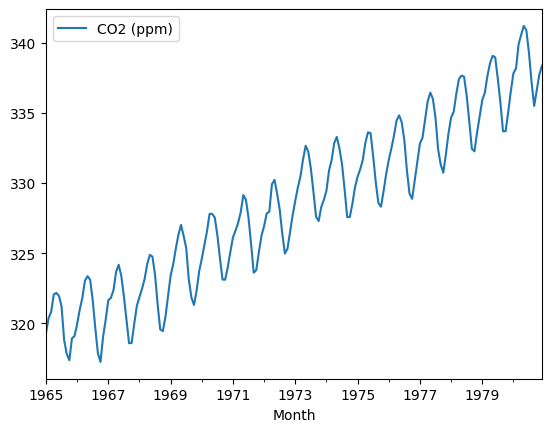

In [ ]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

# Define custom parser function to parse dates
def parser(x):
    return datetime.strptime(x, '%Y-%m')  # Adjust the date format according to your data

# Load the CSV file
file_path = '/content/data.csv'  # Adjust the file path accordingly
series = pd.read_csv(file_path, header=0, parse_dates=[0], index_col=0, date_parser=parser)

# Print the first few rows of the series
print(series.head())

# Plot the time series
series.plot()
plt.show()


### **Fit an ARIMA Model (baseline model order = (1,1,1))**

In [ ]:
from datetime import datetime
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m')

series = read_csv('/content/data.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)
series.index = series.index.to_period('M')

# Fit ARIMA model
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()


<ipython-input-2-9fd43f98fec3>:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/data.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)


### **Improve the ARIMA Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(series, order=(7,5,2))
model_fit1 = model1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


### **Model Summary**

In [ ]:
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(7, 5, 2)   Log Likelihood                -276.904
Date:                Sat, 27 Apr 2024   AIC                            573.807
Time:                        02:46:42   BIC                            606.119
Sample:                    01-31-1965   HQIC                           586.900
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.1799      0.345     -6.312      0.000      -2.857      -1.503
ar.L2         -2.2996      0.446     -5.152      0.000      -3.175      -1.425
ar.L3         -2.1720      0.428     -5.070      0.0

### **Forecast (steps=10)**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Splitting into train and test sets
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model2 = ARIMA(train_data, order = (9,2,0))
results = model2.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(series), len(series)+10, typ = 'levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1981-01    338.829450
1981-02    339.410077
1981-03    339.846441
1981-04    339.951027
1981-05    339.624439
1981-06    338.996781
1981-07    338.387871
1981-08    338.097810
1981-09    338.219246
1981-10    338.635268
1981-11    339.168786
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  1.1498843083979555
RMSE:  1.0723265866320557


### **Plotting Forcast**

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

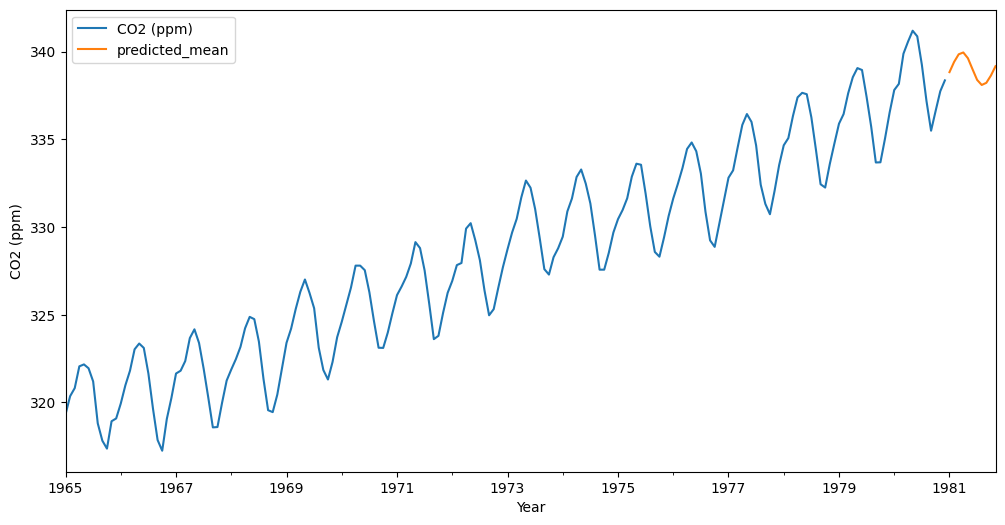

In [ ]:
ylabel='CO2 (ppm)'
xlabel='Year'

ax = series.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

### **Grid search**

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(series) * 0.75)
  train_data, test_data = series[0:train_size], series[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model3 = ARIMA(train_data, order = arima_order)
  results = model3.fit()
  forecast = results.predict(len(series), len(series)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(series, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
p_values = range(0,11)
d_values = range(0,6)
q_values = range(0,6)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 0, 4) MSE=104.465
ARIMA(0, 0, 5) MSE=104.375
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 1, 4) MSE=27.987
ARIMA(0, 1, 5) MSE=26.279
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 2, 4) MSE=5.426
ARIMA(0, 2, 5) MSE=5.149
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.208
ARIMA(0, 3, 2) MSE=945.481
ARIMA(0, 3, 3) MSE=1022.852
ARIMA(0, 3, 4) MSE=19.423
ARIMA(0, 3, 5) MSE=21.476
ARIMA(0, 4, 0) MSE=166662176.640
ARIMA(0, 4, 1) MSE=4757.608
ARIMA(0, 4, 2) MSE=4306.161
ARIMA(0, 4, 3) MSE=5320.000
ARIMA(0, 4, 4) MSE=6002.064
ARIMA(0, 4, 5) MSE=12.548
ARIMA(0, 5, 0) MSE=39061712400.078
ARIMA(0, 5, 1) MSE=219489822.647
ARIMA(0, 5, 2) MSE=12130.222
ARIMA(0, 5, 3) MSE=8284.409
ARIMA(0, 5, 4) MSE=16727.272
ARIMA(0, 5, 5) MSE=22884.249
ARIMA(1,

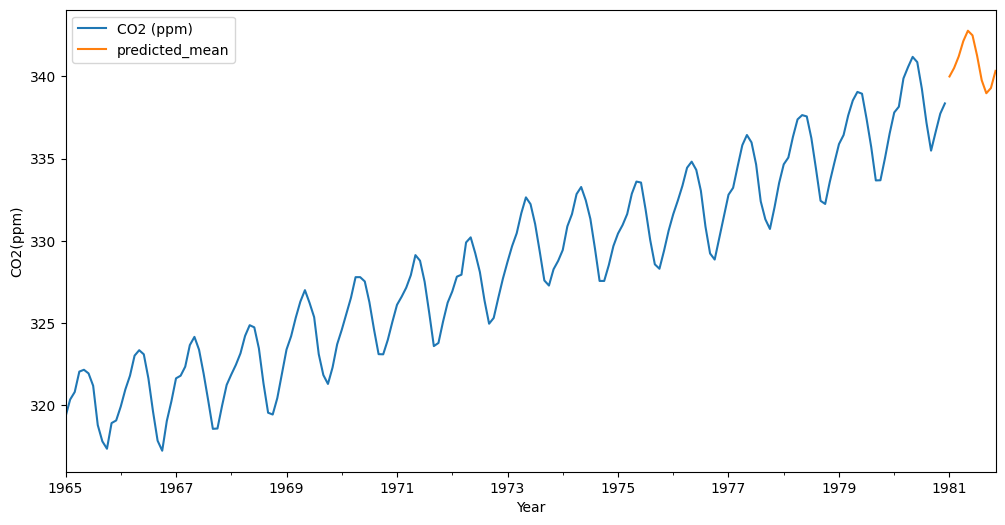

In [ ]:
# Splitting into train and test sets
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model4 = ARIMA(train_data, order = (10, 3, 5))
results = model4.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(series), len(series)+10, typ = 'levels')

ylabel='CO2(ppm)'
xlabel='Year'

ax = series.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

## **Supplementary Activity: dataset_temperature.csv**

### **Importing libraries and loading dataset**

In [ ]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot as plt

def parser(x):
	return datetime.strptime(x, '%Y-%m')

data = read_csv('/content/dataset_temperature.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


### **Visualize Time Series**

            Mean Monthly Temperature
Month                               
1907-01-01                      33.3
1907-02-01                      46.0
1907-03-01                      43.0
1907-04-01                      55.0
1907-05-01                      51.8


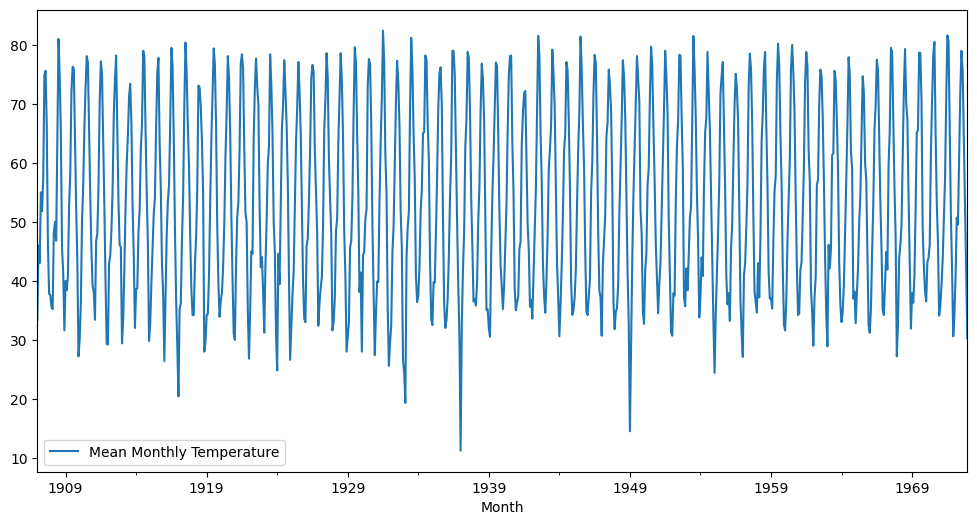

In [ ]:
print(data.head())
data.plot(figsize=(12,6))
plt.show()

### **Fit an ARIMA Model (baseline model order = (1,1,1))**

In [ ]:
from datetime import datetime
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m')

data = read_csv('/content/dataset_temperature.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)
data.index = data.index.to_period('M')

# Fit ARIMA model
model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()


### **Improve the ARIMA Model**

In [ ]:

# Fit ARIMA model
model1 = ARIMA(data, order=(7,6,1))
model_fit1 = model1.fit()


### **Model Summary**

In [ ]:
print(model_fit1.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean Monthly Temperature   No. Observations:                  792
Model:                       ARIMA(7, 6, 1)   Log Likelihood               -3180.699
Date:                      Sat, 27 Apr 2024   AIC                           6379.398
Time:                              03:32:22   BIC                           6421.400
Sample:                          01-31-1907   HQIC                          6395.547
                               - 12-31-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.3469      0.039    -60.928      0.000      -2.422      -2.271
ar.L2         -3.2137      0.101    -31.670      0.000      -3.413      -3.015
ar.L

### **Make a forecast (steps=10)**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Splitting into train and test sets
train_size = int(len(data) * 0.75)
train_data, test_data = data[0:train_size], data[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model2 = ARIMA(train_data, order = (10,2,2))
results = model2.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast1 = results.predict(len(data), len(data)+10, typ = 'levels')

In [ ]:
print("Forecast (steps = 10)")
print(forecast1)

Forecast (steps = 10)
1973-01    46.497695
1973-02    46.165696
1973-03    49.770983
1973-04    56.349958
1973-05    64.149408
1973-06    71.096169
1973-07    75.350615
1973-08    75.796241
1973-09    72.335045
1973-10    65.910578
1973-11    58.253330
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  43.43725848547681
RMSE:  6.5906948408704835


### **Plot the forecast**

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

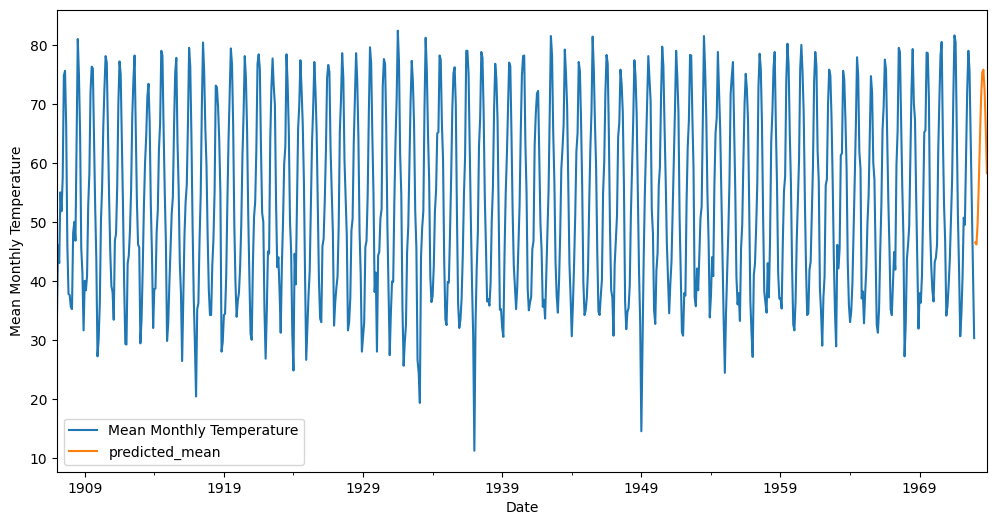

In [ ]:
ylabel='Mean Monthly Temperature'
xlabel='Date'

ax = series.plot(legend=True,figsize=(12,6))
forecast1.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

### **Perform a grid search**

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(data) * 0.75)
  train_data, test_data = data[0:train_size], data[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model3 = ARIMA(train_data, order = arima_order)
  results = model3.fit()
  forecast = results.predict(len(data), len(data)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(data, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
p_values = range(0,11)
d_values = range(0,6)
q_values = range(0,6)
warnings.filterwarnings("ignore")
evaluate_models(data.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=244.680
ARIMA(0, 0, 1) MSE=243.522
ARIMA(0, 0, 2) MSE=241.414
ARIMA(0, 0, 3) MSE=240.950
ARIMA(0, 0, 4) MSE=239.970
ARIMA(0, 0, 5) MSE=241.588
ARIMA(0, 1, 0) MSE=495.038
ARIMA(0, 1, 1) MSE=563.035
ARIMA(0, 1, 2) MSE=762.177
ARIMA(0, 1, 3) MSE=241.417
ARIMA(0, 1, 4) MSE=1143.267
ARIMA(0, 1, 5) MSE=239.988
ARIMA(0, 2, 0) MSE=1244065.976
ARIMA(0, 2, 1) MSE=1228064.280
ARIMA(0, 2, 2) MSE=1375959.214
ARIMA(0, 2, 3) MSE=1226.256
ARIMA(0, 2, 4) MSE=1419.364
ARIMA(0, 2, 5) MSE=2053.969
ARIMA(0, 3, 0) MSE=75530369.710
ARIMA(0, 3, 1) MSE=1146838.733
ARIMA(0, 3, 2) MSE=1228565.660
ARIMA(0, 3, 3) MSE=1377435.736
ARIMA(0, 3, 4) MSE=1151.924
ARIMA(0, 3, 5) MSE=15532.727
ARIMA(0, 4, 0) MSE=15402163730678.379
ARIMA(0, 4, 1) MSE=14427689.115
ARIMA(0, 4, 2) MSE=3201426308429.200
ARIMA(0, 4, 3) MSE=16784068.628
ARIMA(0, 4, 4) MSE=19190516.078
ARIMA(0, 4, 5) MSE=4083864974.463
ARIMA(0, 5, 0) MSE=263224100497633536.000
ARIMA(0, 5, 1) MSE=28345435651385.586
ARIMA(0, 5, 2) MSE=11821476222.

### **Applying Grid Search Results**

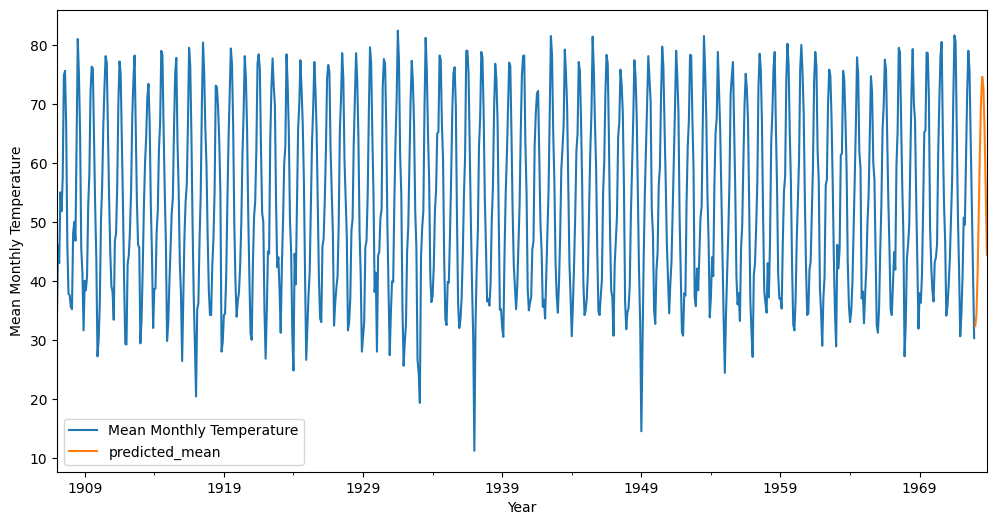

In [ ]:
# Splitting into train and test sets
train_size = int(len(data) * 0.75)
train_data, test_data = data[0:train_size], data[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model4 = ARIMA(train_data, order = (3, 1, 4))
results = model4.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(data), len(data)+10, typ = 'levels')

ylabel='Mean Monthly Temperature'
xlabel='Year'

ax = series.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

## **Conclusion:**

- For this activity, I learned and performed  ARIMA model, plotting time series, and performing Grid search. Autoregressive Integrated Moving Average (ARIMA) model is a widely used model for time series data which includes trends and fluctuations. Grid search is used to determine which ARIMA value will result in the best performance of the model. Overall, this assignment was interesting to learn and improved my knowledge for this course.